<a href="https://colab.research.google.com/github/cadyngo/EAS-Math-for-AI/blob/main/Matrix_Decomposition_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

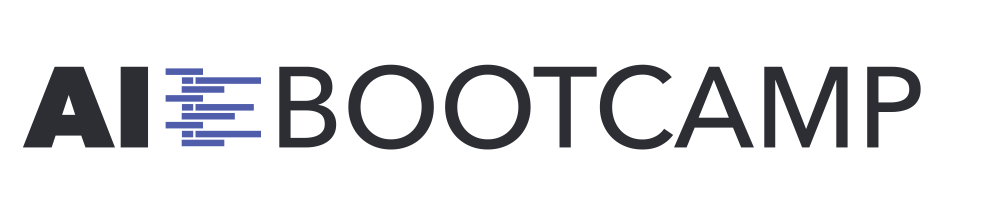

# Matrix Decomposition

This notebook walks through the five most important matrix decompositions in linear algebra and machine learning:

1. **LU Decomposition** — Solving linear systems efficiently
2. **Cholesky Decomposition** — The faster, stabler choice for symmetric positive definite matrices
3. **QR Decomposition** — Orthogonalization and stable least squares
4. **Eigenvalue Decomposition (EVD)** — Understanding how matrices transform space
5. **Singular Value Decomposition (SVD)** — The Swiss Army knife that works on any matrix

## Why do we decompose matrices?

The core idea: **break a complex matrix into simpler pieces** that are easier to work with.

Instead of working with an arbitrary matrix $A$, we factor it into matrices with nice structure (triangular, diagonal, orthogonal) that make computation faster, more stable, or more interpretable.

## Quick Reference

| Decomposition | Form | Works For | Primary ML Use |
|---------------|------|-----------|----------------|
| LU | $A = LU$ | Square, invertible | Solving $Ax = b$ |
| Cholesky | $A = LL^T$ | Symmetric positive definite | Gaussians, GPs, covariance matrices |
| QR | $A = QR$ | Any matrix | Least squares regression |
| EVD | $A = V\Lambda V^{-1}$ | Square, diagonalizable | PCA, spectral methods |
| SVD | $A = U\Sigma V^T$ | Any matrix | Dimensionality reduction, recommenders, compression |Claude is AI and can make mistakes. Please double-check responses.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

np.set_printoptions(precision=4, suppress=True)

# LU Decomposition

## What is it?

LU decomposition factors a matrix $A$ into:

$$A = LU$$

where:
- **L** is **unit lower triangular** (zeros above the diagonal, 1s on the diagonal)
- **U** is **upper triangular** (zeros below the diagonal)

$$\begin{bmatrix} a & b & c \\ d & e & f \\ g & h & i \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 \\ * & 1 & 0 \\ * & * & 1 \end{bmatrix} \begin{bmatrix} * & * & * \\ 0 & * & * \\ 0 & 0 & * \end{bmatrix}$$

## Why do we care?

**Solving linear systems $Ax = b$ becomes easy.**

If $A = LU$, then solving $Ax = b$ breaks into two simple steps:
1. Solve $Ly = b$ for $y$ (forward substitution — trivial because $L$ is triangular)
2. Solve $Ux = y$ for $x$ (back substitution — trivial because $U$ is triangular)

**The big win:** If you need to solve $Ax = b$ for many different $b$ vectors (same $A$), you compute LU once and reuse it. The factorization is $O(n^3)$, but each subsequent solve is only $O(n^2)$.

## Connection to Gaussian Elimination

LU decomposition *is* Gaussian elimination recorded in matrix form. When you eliminate entries below the diagonal, the multipliers you use become the entries of $L$, and the resulting row-reduced matrix is $U$.

## ML Applications
- Solving linear systems (appears everywhere)
- Computing determinants: $\det(A) = \det(L) \cdot \det(U) = \prod u_{ii}$
- Matrix inversion
- Any algorithm that repeatedly solves $Ax = b$ with fixed $A$

In [ ]:
def lu_decomposition(A):
    """
    Compute LU decomposition: A = LU

    This is Gaussian elimination — we eliminate entries below the diagonal
    one column at a time, storing the multipliers in L.
    """
    n = A.shape[0]
    L = np.eye(n)                   # Start with identity
    U = A.copy().astype(float)      # This will become upper triangular

    for col in range(n - 1):
        for row in range(col + 1, n):
            # TODO: Compute the multiplier (how much of pivot row to subtract)
            multiplier = ____________________

            # TODO: Store multiplier in L
            ____________________

            # TODO: Eliminate — subtract (multiplier × pivot row) from current row
            U[row, col:] = ____________________

    return L, U


# Demo
A = np.array([
    [2, 1, 1],
    [4, 3, 3],
    [8, 7, 9]
], dtype=float)

print("Original matrix A:")
print(A)

L, U = lu_decomposition(A)

print("\nL (lower triangular):")
print(L)

print("\nU (upper triangular):")
print(U)

print("\nL @ U (should equal A):")
print(L @ U)

print(f"\n✓ Matches: {np.allclose(A, L @ U)}")

Original matrix A:
[[2. 1. 1.]
 [4. 3. 3.]
 [8. 7. 9.]]

L (lower triangular):
[[1. 0. 0.]
 [2. 1. 0.]
 [4. 3. 1.]]

U (upper triangular):
[[2. 1. 1.]
 [0. 1. 1.]
 [0. 0. 2.]]

L @ U (should equal A):
[[2. 1. 1.]
 [4. 3. 3.]
 [8. 7. 9.]]

✓ Matches: True


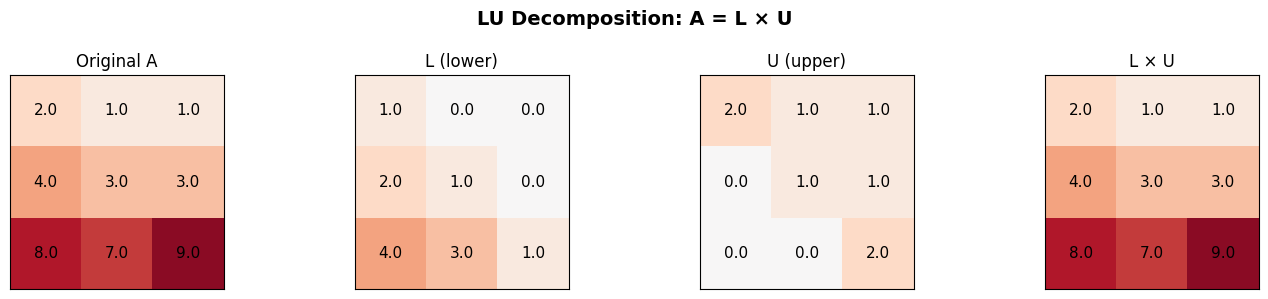

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(14, 3))

matrices = [A, L, U, L @ U]
titles = ['Original A', 'L (lower)', 'U (upper)', 'L × U']

for ax, M, title in zip(axes, matrices, titles):
    ax.imshow(M, cmap='RdBu_r', vmin=-10, vmax=10)
    ax.set_title(title, fontsize=12)

    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            ax.text(j, i, f'{M[i,j]:.1f}', ha='center', va='center', fontsize=11)

    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle('LU Decomposition: A = L × U', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Suppose we need to solve Ax = b for several different b vectors

A = np.array([
    [4, 2, 1],
    [2, 5, 2],
    [1, 2, 4]
], dtype=float)

b1 = np.array([1, 2, 3], dtype=float)
b2 = np.array([4, 5, 6], dtype=float)
b3 = np.array([7, 8, 9], dtype=float)

# Compute LU factorization ONCE
lu_factorization = la.lu_factor(A)
print("LU factorization computed once.\n")

# Solve for each b — fast, just forward/back substitution
x1 = la.lu_solve(lu_factorization, b1)
x2 = la.lu_solve(lu_factorization, b2)
x3 = la.lu_solve(lu_factorization, b3)

print(f"b = {b1}  →  x = {x1}")
print(f"b = {b2}  →  x = {x2}")
print(f"b = {b3}  →  x = {x3}")

# Verify
print(f"\nCheck: A @ x1 = {A @ x1}")

LU factorization computed once.

b = [1. 2. 3.]  →  x = [0.0196 0.1176 0.6863]
b = [4. 5. 6.]  →  x = [0.549  0.2941 1.2157]
b = [7. 8. 9.]  →  x = [1.0784 0.4706 1.7451]

Check: A @ x1 = [1. 2. 3.]


# Cholesky Decomposition

## What is it?

Cholesky decomposition is a special case of LU for **symmetric positive definite (SPD)** matrices:

$$A = LL^T$$

where $L$ is lower triangular with **positive diagonal entries**.

Notice we only need one factor — $L$ — since the upper part is just $L^T$.

## What is Symmetric Positive Definite?

A matrix $A$ is SPD if:
1. **Symmetric:** $A = A^T$
2. **Positive definite:** $x^T A x > 0$ for all nonzero vectors $x$

Intuition: SPD matrices define ellipsoids. Covariance matrices are always SPD (or semi-definite).

**Quick test:** A symmetric matrix is positive definite iff all its eigenvalues are positive.

## Why is Cholesky better than LU?

1. **~2× faster** — we only compute one triangular factor
2. **More numerically stable** — no pivoting needed
3. **Guaranteed to exist** for any SPD matrix
4. **Unique** — there's only one Cholesky factor

## ML Applications

- **Decomposition of covariance matrices or kernel matrices**: These are SPD by construction and the most common matrices to need decomposing in ML
- **Sampling from multivariate Gaussians:** If $z \sim N(0, I)$, then $x = \mu + Lz \sim N(\mu, \Sigma)$ where $\Sigma = LL^T$
- **Gaussian Processes:** Computing log-likelihoods requires solving systems with covariance matrices
- **Checking positive definiteness:** If Cholesky fails, the matrix isn't SPD


In [ ]:
def cholesky_decomposition(A):
    """
    Compute Cholesky decomposition: A = L @ L.T
    Only works for symmetric positive definite matrices.
    """
    n = A.shape[0]
    L = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1):
            if i == j:
                # TODO: Diagonal entry — L[i,i] = sqrt(A[i,i] - sum of squares in this row of L)
                val = ____________________
                if val <= 0:
                    raise ValueError("Matrix is not positive definite")
                L[i, j] = ____________________
            else:
                # TODO: Off-diagonal — L[i,j] = (A[i,j] - dot product) / L[j,j]
                L[i, j] = ____________________

    return L


# Create a symmetric positive definite matrix
B = np.array([
    [2, 0, 0],
    [1, 3, 0],
    [1, 1, 2]
], dtype=float)

A = B @ B.T  # This is guaranteed to be SPD

print("SPD matrix A:")
print(A)
print(f"\nSymmetric? {np.allclose(A, A.T)}")
print(f"Eigenvalues: {np.linalg.eigvalsh(A)}  (all positive ✓)")

L = cholesky_decomposition(A)

print("\nCholesky factor L:")
print(L)

print("\nL @ L.T (should equal A):")
print(L @ L.T)

print(f"\n✓ Matches: {np.allclose(A, L @ L.T)}")

SPD matrix A:
[[ 4.  2.  2.]
 [ 2. 10.  4.]
 [ 2.  4.  6.]]

Symmetric? True
Eigenvalues: [ 2.7085  4.     13.2915]  (all positive ✓)

Cholesky factor L:
[[2. 0. 0.]
 [1. 3. 0.]
 [1. 1. 2.]]

L @ L.T (should equal A):
[[ 4.  2.  2.]
 [ 2. 10.  4.]
 [ 2.  4.  6.]]

✓ Matches: True


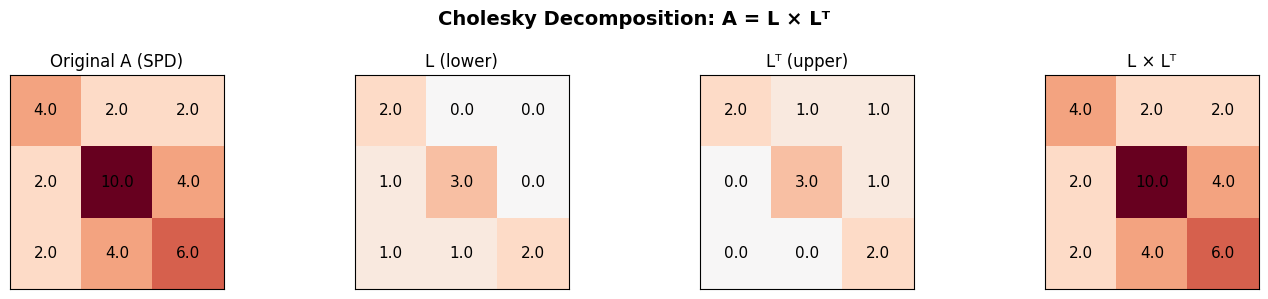

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(14, 3))

matrices = [A, L, L.T, L @ L.T]
titles = ['Original A (SPD)', 'L (lower)', 'Lᵀ (upper)', 'L × Lᵀ']

for ax, M, title in zip(axes, matrices, titles):
    ax.imshow(M, cmap='RdBu_r', vmin=-10, vmax=10)
    ax.set_title(title, fontsize=12)

    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            ax.text(j, i, f'{M[i,j]:.1f}', ha='center', va='center', fontsize=11)

    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle('Cholesky Decomposition: A = L × Lᵀ', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Mean μ: [2 3]
Covariance Σ:
[[4 2]
 [2 3]]

Cholesky factor L:
[[2.     0.    ]
 [1.     1.4142]]


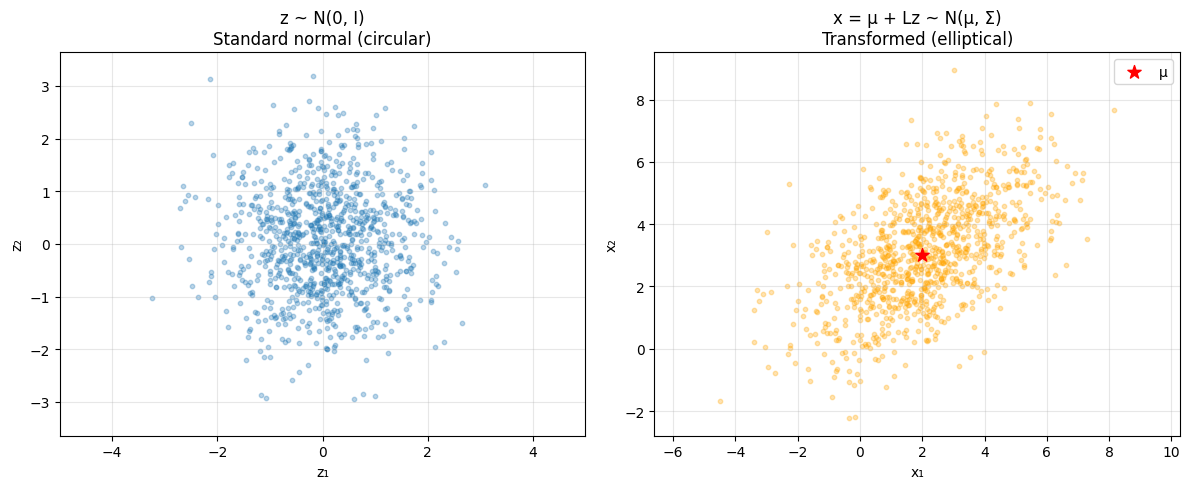


Sample mean: [2.0664 3.1138]  (should be ≈ [2 3])
Sample cov:
[[3.6987 1.8565]
 [1.8565 2.9921]]
(should be ≈ Σ)


In [ ]:
# To sample from N(μ, Σ):
# 1. Compute L where Σ = L @ L.T
# 2. Sample z ~ N(0, I)
# 3. Transform: x = μ + L @ z

mu = np.array([2, 3])
Sigma = np.array([
    [4, 2],
    [2, 3]
])

L = np.linalg.cholesky(Sigma)

print("Mean μ:", mu)
print("Covariance Σ:")
print(Sigma)
print("\nCholesky factor L:")
print(L)

np.random.seed(42)
n_samples = 1000

# TODO: Sample z from standard normal N(0, I)
z = ____________________

# TODO: Transform to get x ~ N(μ, Σ)
x = ____________________

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(z[:, 0], z[:, 1], alpha=0.3, s=10)
axes[0].set_title('z ~ N(0, I)\nStandard normal (circular)', fontsize=12)
axes[0].set_xlabel('z₁')
axes[0].set_ylabel('z₂')
axes[0].axis('equal')
axes[0].set_xlim(-4, 4)
axes[0].set_ylim(-4, 4)
axes[0].grid(True, alpha=0.3)

axes[1].scatter(x[:, 0], x[:, 1], alpha=0.3, s=10, color='orange')
axes[1].scatter(*mu, color='red', s=100, marker='*', zorder=5, label='μ')
axes[1].set_title('x = μ + Lz ~ N(μ, Σ)\nTransformed (elliptical)', fontsize=12)
axes[1].set_xlabel('x₁')
axes[1].set_ylabel('x₂')
axes[1].legend()
axes[1].axis('equal')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nSample mean: {x.mean(axis=0)}  (should be ≈ {mu})")
print(f"Sample cov:\n{np.cov(x.T)}")
print(f"(should be ≈ Σ)")

# QR Decomposition

## What is it?

QR decomposition factors any matrix $A$ (even rectangular!) into:

$$A = QR$$

where:
- **Q** is **orthogonal** (its columns are perpendicular unit vectors, so $Q^TQ = I$)
- **R** is **upper triangular**

## What makes Q special?

Orthogonal matrices have magical properties:

1. **Inverse is just the transpose:** $Q^{-1} = Q^T$ (finding inverse computationally cheap)
2. **Preserves lengths:** $\|Qx\| = \|x\|$
3. **Preserves angles** between vectors

Geometrically, orthogonal matrices are **pure rotations and reflections** — they reorient space without stretching or squashing.

## Connection to Gram-Schmidt

QR decomposition is the **Gram-Schmidt orthogonalization process** written in matrix form:
- Take the columns of $A$
- Make them orthonormal → these become the columns of $Q$
- $R$ records the coefficients from the projections

## Why do we care?

**Solving least squares:** Given an overdetermined system $Ax = b$ (more equations than unknowns), we want to minimize $\|Ax - b\|^2$.

The normal equations say $x = (A^TA)^{-1}A^Tb$, but forming $A^TA$ squares the condition number and can be numerically unstable.

With QR: since $A = QR$, the solution is simply $x = R^{-1}Q^Tb$ — much more stable!

## ML Applications

- **Linear regression** (least squares)
- **Orthogonalizing features**
- **Computing eigenvalues** (the QR algorithm)

In [ ]:
def qr_gram_schmidt(A):
    """
    QR decomposition via Gram-Schmidt orthogonalization.

    We process columns of A one by one:
    1. Subtract projections onto previous q vectors
    2. Normalize to get the next q
    """
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        # Start with the j-th column of A
        v = A[:, j].copy()

        # Subtract projections onto all previous q's
        for i in range(j):
            # TODO: Compute projection coefficient (dot product of Q[:,i] and A[:,j])
            R[i, j] = ____________________

            # TODO: Subtract the projection from v
            v = ____________________

        # TODO: Compute the norm of v and store in R[j,j]
        R[j, j] = ____________________

        # TODO: Normalize v to get the j-th column of Q
        Q[:, j] = ____________________

    return Q, R


A = np.array([
    [1, 1, 0],
    [1, 0, 1],
    [0, 1, 1]
], dtype=float)

print("Original matrix A:")
print(A)

Q, R = qr_gram_schmidt(A)

print("\nQ (orthogonal):")
print(Q)

print("\nR (upper triangular):")
print(R)

print("\nQ @ R (should equal A):")
print(Q @ R)

print(f"\n✓ Reconstruction matches: {np.allclose(A, Q @ R)}")

print("\nQ.T @ Q (should be identity):")
print(Q.T @ Q)
print(f"✓ Q is orthogonal: {np.allclose(Q.T @ Q, np.eye(3))}")

Original matrix A:
[[1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]]

Q (orthogonal):
[[ 0.7071  0.4082 -0.5774]
 [ 0.7071 -0.4082  0.5774]
 [ 0.      0.8165  0.5774]]

R (upper triangular):
[[1.4142 0.7071 0.7071]
 [0.     1.2247 0.4082]
 [0.     0.     1.1547]]

Q @ R (should equal A):
[[1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]]

✓ Reconstruction matches: True

Q.T @ Q (should be identity):
[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]
✓ Q is orthogonal: True


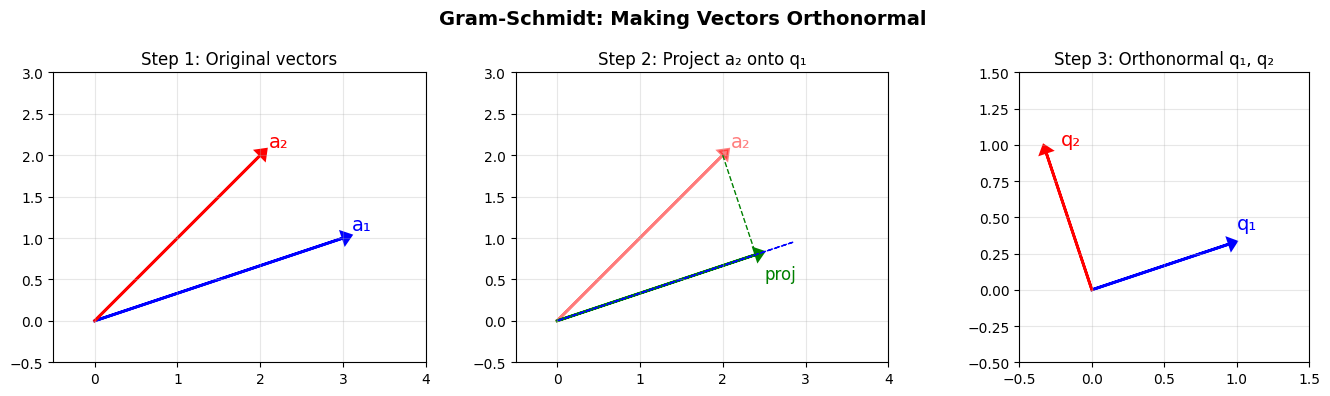

q₁ · q₂ = 0.000000  (≈ 0, so they're orthogonal)
|q₁| = 1.0000, |q₂| = 1.0000  (both unit length)


In [ ]:
# Let's see Gram-Schmidt step by step on two vectors

a1 = np.array([3, 1])
a2 = np.array([2, 2])

# Step 1: Normalize a1 to get q1
q1 = a1 / np.linalg.norm(a1)

# Step 2: Project a2 onto q1, then subtract
proj = np.dot(a2, q1) * q1  # projection of a2 onto q1
v2 = a2 - proj               # subtract projection

# Step 3: Normalize to get q2
q2 = v2 / np.linalg.norm(v2)

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot 1: Original vectors
ax = axes[0]
ax.arrow(0, 0, a1[0], a1[1], head_width=0.15, head_length=0.1, fc='blue', ec='blue', lw=2)
ax.arrow(0, 0, a2[0], a2[1], head_width=0.15, head_length=0.1, fc='red', ec='red', lw=2)
ax.text(a1[0]+0.1, a1[1]+0.1, 'a₁', fontsize=14, color='blue')
ax.text(a2[0]+0.1, a2[1]+0.1, 'a₂', fontsize=14, color='red')
ax.set_xlim(-0.5, 4)
ax.set_ylim(-0.5, 3)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.set_title('Step 1: Original vectors', fontsize=12)

# Plot 2: Show projection
ax = axes[1]
ax.arrow(0, 0, a2[0], a2[1], head_width=0.15, head_length=0.1, fc='red', ec='red', lw=2, alpha=0.5)
ax.arrow(0, 0, proj[0], proj[1], head_width=0.15, head_length=0.1, fc='green', ec='green', lw=2)
ax.arrow(0, 0, q1[0]*3, q1[1]*3, head_width=0, head_length=0, fc='blue', ec='blue', lw=1, ls='--')
ax.plot([a2[0], proj[0]], [a2[1], proj[1]], 'g--', lw=1)
ax.text(proj[0]+0.1, proj[1]-0.3, 'proj', fontsize=12, color='green')
ax.text(a2[0]+0.1, a2[1]+0.1, 'a₂', fontsize=14, color='red', alpha=0.5)
ax.set_xlim(-0.5, 4)
ax.set_ylim(-0.5, 3)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.set_title('Step 2: Project a₂ onto q₁', fontsize=12)

# Plot 3: Final orthonormal vectors
ax = axes[2]
ax.arrow(0, 0, q1[0], q1[1], head_width=0.08, head_length=0.05, fc='blue', ec='blue', lw=2)
ax.arrow(0, 0, q2[0], q2[1], head_width=0.08, head_length=0.05, fc='red', ec='red', lw=2)
ax.text(q1[0]+0.05, q1[1]+0.1, 'q₁', fontsize=14, color='blue')
ax.text(q2[0]+0.1, q2[1]+0.05, 'q₂', fontsize=14, color='red')
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.set_title('Step 3: Orthonormal q₁, q₂', fontsize=12)

plt.suptitle('Gram-Schmidt: Making Vectors Orthonormal', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"q₁ · q₂ = {np.dot(q1, q2):.6f}  (≈ 0, so they're orthogonal)")
print(f"|q₁| = {np.linalg.norm(q1):.4f}, |q₂| = {np.linalg.norm(q2):.4f}  (both unit length)")

Fitted parameters: intercept = 1.1289, slope = 1.8840
True parameters:   intercept = 1.0000, slope = 2.0000


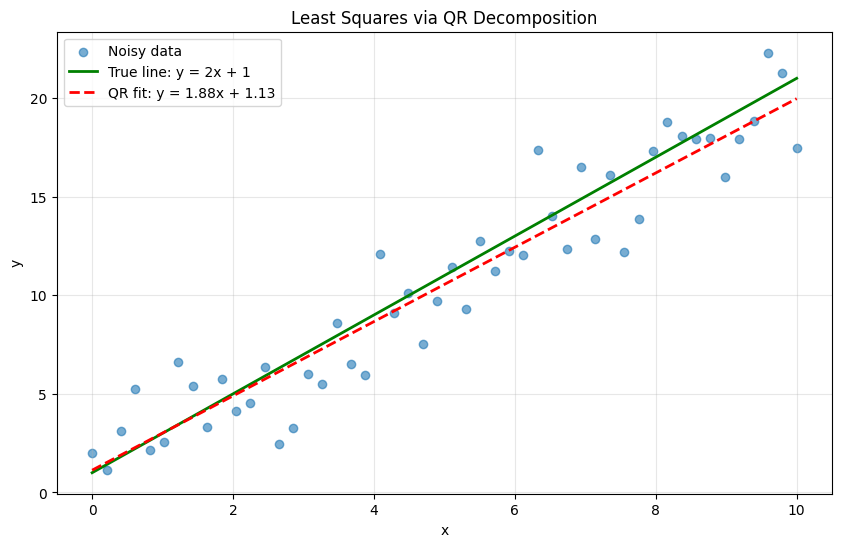

In [ ]:
np.random.seed(42)

# Generate data: true line is y = 2x + 1
x = np.linspace(0, 10, 50)
y_true = 2 * x + 1
y = y_true + np.random.randn(50) * 2  # add noise

# Design matrix: [1, x] for intercept and slope
A = np.column_stack([np.ones_like(x), x])

# TODO: Compute QR decomposition of A
Q, R = ____________________

# TODO: Solve for beta using R @ beta = Q.T @ y
beta = ____________________

print(f"Fitted parameters: intercept = {beta[0]:.4f}, slope = {beta[1]:.4f}")
print(f"True parameters:   intercept = 1.0000, slope = 2.0000")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label='Noisy data')
plt.plot(x, y_true, 'g-', lw=2, label='True line: y = 2x + 1')
plt.plot(x, beta[0] + beta[1]*x, 'r--', lw=2, label=f'QR fit: y = {beta[1]:.2f}x + {beta[0]:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares via QR Decomposition')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Create an ill-conditioned problem
# Vandermonde matrix with points close together → nearly collinear columns

x_pts = np.array([1.0, 1.001, 1.002, 1.003, 1.004])
degree = 4

# Vandermonde matrix
A_ill = np.column_stack([x_pts**i for i in range(degree + 1)])
b = np.sin(x_pts)

print(f"Condition number of A: {np.linalg.cond(A_ill):.2e}")
print(f"Condition number of AᵀA: {np.linalg.cond(A_ill.T @ A_ill):.2e}")
print("(AᵀA squares the condition number — this is why normal equations can fail)\n")

# Method 1: Normal equations (unstable)
try:
    x_normal = np.linalg.solve(A_ill.T @ A_ill, A_ill.T @ b)
    resid_normal = np.linalg.norm(A_ill @ x_normal - b)
    print(f"Normal equations residual: {resid_normal:.2e}")
except:
    print("Normal equations failed!")

# Method 2: QR (stable)
Q, R = np.linalg.qr(A_ill)
x_qr = la.solve_triangular(R, Q.T @ b)
resid_qr = np.linalg.norm(A_ill @ x_qr - b)
print(f"QR residual: {resid_qr:.2e}")

Condition number of A: 1.47e+13
Condition number of AᵀA: 6.95e+17
(AᵀA squares the condition number — this is why normal equations can fail)

Normal equations residual: 9.62e-10
QR residual: 3.14e-16


# Eigenvalue Decomposition (Diagonalization)

## What is it?

Eigenvalue decomposition factors a square matrix $A$ into:

$$A = V \Lambda V^{-1}$$

where:
- **V** is a matrix whose columns are **eigenvectors**
- **Λ** (Lambda) is a **diagonal** matrix of **eigenvalues**

For symmetric matrices, this simplifies to $A = V \Lambda V^T$ since eigenvectors are orthogonal.

## What are eigenvalues and eigenvectors?

An eigenvector $v$ of matrix $A$ satisfies:

$$Av = \lambda v$$

When $A$ transforms $v$, it only **scales** $v$ by the factor $\lambda$. The direction doesn't change!

Most vectors get rotated and stretched by a matrix. Eigenvectors are the special directions that only get stretched.

## Geometric Intuition

Think of a matrix as a transformation that warps space:

- **Eigenvectors** = the special directions that don't rotate, only stretch
- **Eigenvalues** = how much each direction stretches
  - $|\lambda| > 1$: stretching
  - $|\lambda| < 1$: shrinking
  - $\lambda < 0$: flip direction
  - $\lambda = 0$: collapse to zero

A matrix transforms a circle into an ellipse. The eigenvectors point along the axes of that ellipse, and the eigenvalues tell you the lengths of those axes.

## Why do we care?

1. **Matrix powers become trivial:** $A^n = V \Lambda^n V^{-1}$, and $\Lambda^n$ just raises each diagonal entry to the $n$th power
2. **Understand what a matrix "does":** Eigenvalues reveal stretching/shrinking behavior
3. **Diagonalization simplifies everything:** Diagonal matrices are trivial to work with

## ML Applications

- **PCA:** Find eigenvectors of the covariance matrix → directions of maximum variance
- **Spectral clustering:** Use eigenvectors of the similarity/Laplacian matrix
- **PageRank:** The ranking is the dominant eigenvector of the link matrix
- **Markov chains:** Stationary distribution is the eigenvector with $\lambda = 1$

In [ ]:
A = np.array([
    [4, 2],
    [1, 3]
], dtype=float)

print("Matrix A:")
print(A)

# Compute eigenvalues and eigenvectors
eigenvalues, V = np.linalg.eig(A)

print(f"\nEigenvalues: {eigenvalues}")
print(f"\nEigenvectors (columns of V):")
print(V)

# Verify: Av = λv for each eigenvector
print("\n--- Verify Av = λv ---")
for i in range(len(eigenvalues)):
    v = V[:, i]
    lam = eigenvalues[i]
    Av = A @ v
    lam_v = lam * v
    print(f"v{i+1} = {v}")
    print(f"  Av   = {Av}")
    print(f"  λv   = {lam_v}")
    print(f"  Match: {np.allclose(Av, lam_v)}\n")

Matrix A:
[[4. 2.]
 [1. 3.]]

Eigenvalues: [5. 2.]

Eigenvectors (columns of V):
[[ 0.8944 -0.7071]
 [ 0.4472  0.7071]]

--- Verify Av = λv ---
v1 = [0.8944 0.4472]
  Av   = [4.4721 2.2361]
  λv   = [4.4721 2.2361]
  Match: True

v2 = [-0.7071  0.7071]
  Av   = [-1.4142  1.4142]
  λv   = [-1.4142  1.4142]
  Match: True



In [ ]:
# TODO: Construct the diagonal matrix of eigenvalues
Lambda = ____________________

# TODO: Compute the inverse of V
V_inv = ____________________

print("V (eigenvector matrix):")
print(V)

print("\nΛ (diagonal eigenvalue matrix):")
print(Lambda)

print("\nV⁻¹:")
print(V_inv)

# TODO: Reconstruct A as V @ Lambda @ V_inv
A_reconstructed = ____________________

print("\nV @ Λ @ V⁻¹:")
print(A_reconstructed)

print(f"\n✓ Matches original A: {np.allclose(A, A_reconstructed)}")

V (eigenvector matrix):
[[ 0.8944 -0.7071]
 [ 0.4472  0.7071]]

Λ (diagonal eigenvalue matrix):
[[5. 0.]
 [0. 2.]]

V⁻¹:
[[ 0.7454  0.7454]
 [-0.4714  0.9428]]

V @ Λ @ V⁻¹:
[[4. 2.]
 [1. 3.]]

✓ Matches original A: True


Symmetric matrix:
[[2. 1.]
 [1. 2.]]


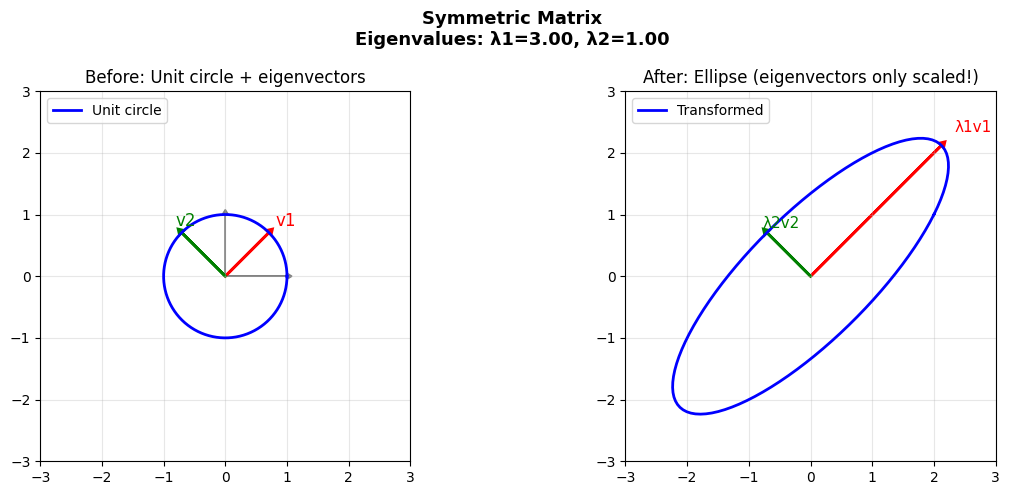

In [ ]:
def plot_transformation(A, title=""):
    """Show how matrix A transforms the unit circle."""

    # Unit circle
    theta = np.linspace(0, 2*np.pi, 100)
    circle = np.array([np.cos(theta), np.sin(theta)])

    # Transform it
    ellipse = A @ circle

    # Get eigenvectors/eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(A)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Before
    ax = axes[0]
    ax.plot(circle[0], circle[1], 'b-', lw=2, label='Unit circle')
    ax.arrow(0, 0, 1, 0, head_width=0.1, head_length=0.08, fc='gray', ec='gray')
    ax.arrow(0, 0, 0, 1, head_width=0.1, head_length=0.08, fc='gray', ec='gray')

    # Draw eigenvectors
    colors = ['red', 'green']
    for i, (val, vec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        if np.isreal(val):
            ax.arrow(0, 0, vec[0].real, vec[1].real, head_width=0.1, head_length=0.08,
                    fc=colors[i], ec=colors[i], lw=2)
            ax.text(vec[0].real*1.15, vec[1].real*1.15, f'v{i+1}', fontsize=12, color=colors[i])

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title('Before: Unit circle + eigenvectors', fontsize=12)
    ax.legend(loc='upper left')

    # After
    ax = axes[1]
    ax.plot(ellipse[0], ellipse[1], 'b-', lw=2, label='Transformed')

    # Draw transformed eigenvectors (they just get scaled!)
    for i, (val, vec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        if np.isreal(val):
            transformed = A @ vec.real
            ax.arrow(0, 0, transformed[0], transformed[1], head_width=0.1, head_length=0.08,
                    fc=colors[i], ec=colors[i], lw=2)
            ax.text(transformed[0]*1.1, transformed[1]*1.1, f'λ{i+1}v{i+1}', fontsize=11, color=colors[i])

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title('After: Ellipse (eigenvectors only scaled!)', fontsize=12)
    ax.legend(loc='upper left')

    eig_str = ', '.join([f'λ{i+1}={v:.2f}' for i, v in enumerate(eigenvalues.real)])
    plt.suptitle(f'{title}\nEigenvalues: {eig_str}', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()


# Example 1: Symmetric matrix (orthogonal eigenvectors)
A1 = np.array([[2, 1], [1, 2]], dtype=float)
print("Symmetric matrix:")
print(A1)
plot_transformation(A1, "Symmetric Matrix")

Diagonal matrix (pure scaling):
[[2.  0. ]
 [0.  0.5]]
Stretches by 2 horizontally, shrinks by 0.5 vertically


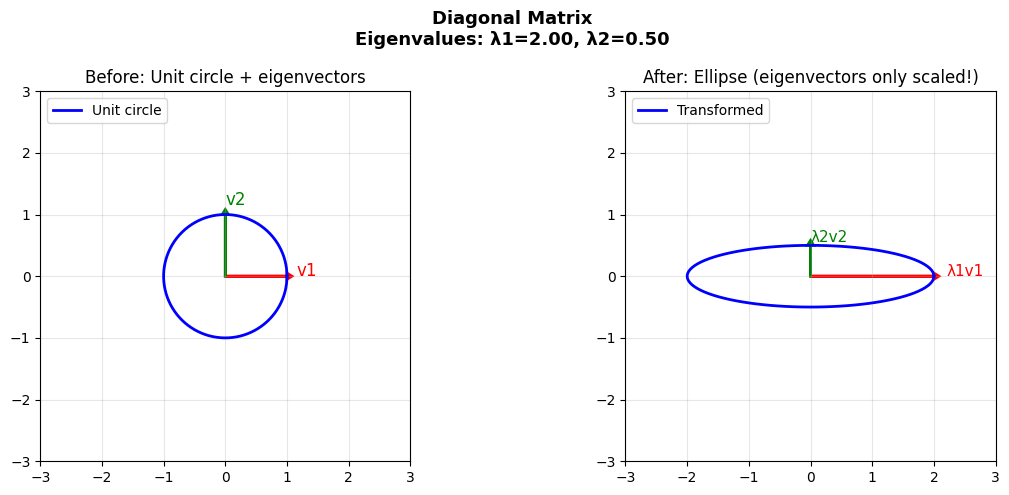


Upper triangular matrix:
[[1. 1.]
 [0. 2.]]
Eigenvalues are on the diagonal: 1 and 2


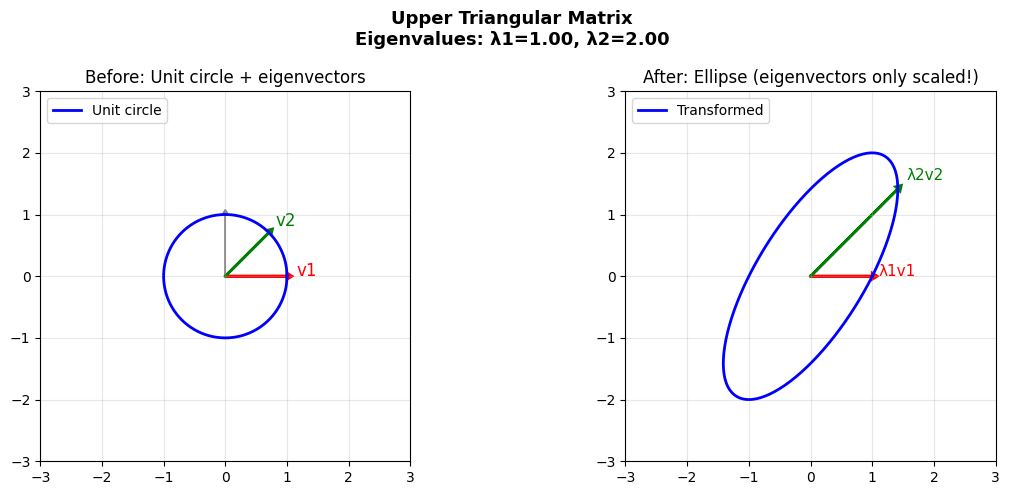

In [ ]:
# Example 2: Pure stretch along axes
A2 = np.array([[2, 0], [0, 0.5]], dtype=float)
print("Diagonal matrix (pure scaling):")
print(A2)
print("Stretches by 2 horizontally, shrinks by 0.5 vertically")
plot_transformation(A2, "Diagonal Matrix")

# Example 3: Shear-like matrix
A3 = np.array([[1, 1], [0, 2]], dtype=float)
print("\nUpper triangular matrix:")
print(A3)
print("Eigenvalues are on the diagonal: 1 and 2")
plot_transformation(A3, "Upper Triangular Matrix")

In [ ]:
# If A = VΛV⁻¹, then A^n = VΛ^nV⁻¹
# Λ^n is trivial: just raise each diagonal entry to the power n

A = np.array([[4, 2], [1, 3]], dtype=float)
eigenvalues, V = np.linalg.eig(A)
Lambda = np.diag(eigenvalues)
V_inv = np.linalg.inv(V)

n = 10

# Direct computation
A_n_direct = np.linalg.matrix_power(A, n)

# TODO: Compute Lambda^n (raise each eigenvalue to the power n)
Lambda_n = ____________________

# TODO: Compute A^n via eigendecomposition: V @ Lambda^n @ V_inv
A_n_evd = ____________________

print(f"Computing A^{n}\n")
print(f"Direct method:\n{A_n_direct}\n")
print(f"Via EVD (V @ Λ^{n} @ V⁻¹):\n{A_n_evd.real}\n")
print(f"✓ Match: {np.allclose(A_n_direct, A_n_evd)}")

print("\n" + "="*50)
print("This is how we compute Fibonacci numbers in O(log n)!")
print("="*50)

Computing A^10

Direct method:
[[6510758. 6509734.]
 [3254867. 3255891.]]

Via EVD (V @ Λ^10 @ V⁻¹):
[[6510758. 6509734.]
 [3254867. 3255891.]]

✓ Match: True

This is how we compute Fibonacci numbers in O(log n)!


Sample covariance matrix:
[[2.7894 1.4109]
 [1.4109 0.9609]]

Eigenvalues (variance along each PC): [3.5563 0.1939]
Variance explained: [94.829  5.171]%

PC1 direction: [-0.8786 -0.4776]
PC2 direction: [ 0.4776 -0.8786]


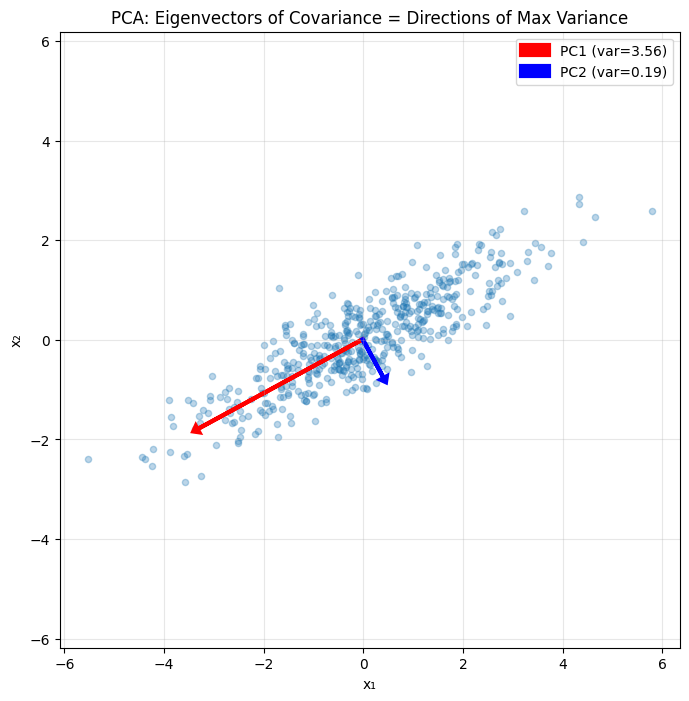


Key insight: The first PC points along the direction of maximum spread!


In [ ]:
# PCA = eigendecomposition of the covariance matrix
# Eigenvectors = principal components (directions of max variance)
# Eigenvalues = variance along each direction

np.random.seed(42)

n_samples = 500
cov_true = [[3, 1.5], [1.5, 1]]
X = np.random.multivariate_normal([0, 0], cov_true, n_samples)

# TODO: Center the data (subtract mean)
X_centered = ____________________

# TODO: Compute the covariance matrix
cov_matrix = ____________________

print("Sample covariance matrix:")
print(cov_matrix)

# TODO: Eigendecomposition of covariance matrix (use eigh for symmetric)
eigenvalues, eigenvectors = ____________________

# Sort by eigenvalue (descending)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print(f"\nEigenvalues (variance along each PC): {eigenvalues}")
print(f"Variance explained: {eigenvalues / eigenvalues.sum() * 100}%")
print(f"\nPC1 direction: {eigenvectors[:, 0]}")
print(f"PC2 direction: {eigenvectors[:, 1]}")

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, s=20)

origin = X.mean(axis=0)
colors = ['red', 'blue']
for i in range(2):
    vec = eigenvectors[:, i]
    scale = np.sqrt(eigenvalues[i]) * 2
    plt.arrow(origin[0], origin[1], vec[0]*scale, vec[1]*scale,
              head_width=0.15, head_length=0.1, fc=colors[i], ec=colors[i], lw=3,
              label=f'PC{i+1} (var={eigenvalues[i]:.2f})')

plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('PCA: Eigenvectors of Covariance = Directions of Max Variance')
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

print("\nKey insight: The first PC points along the direction of maximum spread!")

# Singular Value Decomposition (SVD)

## The Crown Jewel of Matrix Decompositions

SVD factors **any** matrix $A$ (even rectangular!) into:

$$A = U \Sigma V^T$$

where:
- **U** is $m \times m$ orthogonal (columns are "left singular vectors")
- **Σ** (Sigma) is $m \times n$ diagonal with non-negative entries (the "singular values")
- **V** is $n \times n$ orthogonal (columns are "right singular vectors")

The singular values are always real and non-negative, conventionally sorted: $\sigma_1 \geq \sigma_2 \geq \cdots \geq 0$

## Why is SVD so powerful?

1. **Always exists** — unlike eigendecomposition, SVD works for *any* matrix (rectangular, rank-deficient, whatever)
2. **Reveals rank and structure** — the number of non-zero singular values equals the rank; their magnitudes show the "importance" of each component
3. **Best low-rank approximation** — if you zero out the smallest singular values, you get the closest rank-$k$ matrix (in Frobenius norm). This is the Eckart-Young theorem.
4. **Numerically stable** — SVD is the gold standard for numerical linear algebra

## Geometric Interpretation

Any linear transformation can be decomposed into three steps:

1. **Rotate/reflect** in the input space (by $V^T$)
2. **Scale** along each axis (by $\Sigma$) — and change dimensions if rectangular
3. **Rotate/reflect** in the output space (by $U$)

The singular values tell you how much each axis gets stretched. A matrix transforms a sphere into an ellipsoid; the singular values are the lengths of the ellipsoid's axes.

## SVD vs Eigendecomposition

| | EVD | SVD |
|---|---|---|
| **Exists for** | Square, diagonalizable matrices | Any matrix |
| **Factors** | $A = V\Lambda V^{-1}$ | $A = U\Sigma V^T$ |
| **Values** | Eigenvalues (can be negative, complex) | Singular values (always $\geq 0$) |
| **Vectors** | May not be orthogonal | Always orthogonal |

For symmetric positive semi-definite matrices: singular values = eigenvalues.

## ML Applications

- **Dimensionality reduction:** Truncated SVD / PCA
- **Recommender systems:** Matrix factorization (Netflix Prize!)
- **Image compression:** Keep only top singular values
- **NLP:** Latent Semantic Analysis (LSA)
- **Pseudoinverse:** $A^+ = V\Sigma^+ U^T$ (for least squares with rank-deficient matrices)
- **Noise reduction:** Small singular values often correspond to noise

In [ ]:
A = np.array([
    [3, 2, 2],
    [2, 3, -2]
], dtype=float)

print("Matrix A (2×3):")
print(A)

# TODO: Compute SVD
U, sigma, Vt = ____________________

print(f"\nU ({U.shape}):")
print(U)

print(f"\nSingular values: {sigma}")

print(f"\nVᵀ ({Vt.shape}):")
print(Vt)

# Reconstruct: need to build the Σ matrix properly for rectangular A
Sigma = np.zeros_like(A, dtype=float)
np.fill_diagonal(Sigma, sigma)

print(f"\nΣ ({Sigma.shape}):")
print(Sigma)

# TODO: Reconstruct A from U, Sigma, Vt
A_reconstructed = ____________________

print("\nU @ Σ @ Vᵀ:")
print(A_reconstructed)

print(f"\n✓ Matches: {np.allclose(A, A_reconstructed)}")

Matrix A (2×3):
[[ 3.  2.  2.]
 [ 2.  3. -2.]]

U ((2, 2)):
[[-0.7071 -0.7071]
 [-0.7071  0.7071]]

Singular values: [5. 3.]

Vᵀ ((3, 3)):
[[-0.7071 -0.7071 -0.    ]
 [-0.2357  0.2357 -0.9428]
 [-0.6667  0.6667  0.3333]]

Σ ((2, 3)):
[[5. 0. 0.]
 [0. 3. 0.]]

U @ Σ @ Vᵀ:
[[ 3.  2.  2.]
 [ 2.  3. -2.]]

✓ Matches: True


In [ ]:
print("U is orthogonal: UᵀU = I")
print(U.T @ U)
print(f"✓ {np.allclose(U.T @ U, np.eye(U.shape[0]))}")

print("\nV is orthogonal: VᵀV = I")
print(Vt.T @ Vt)  # Note: Vt is V transpose, so Vt.T is V
print(f"✓ {np.allclose(Vt @ Vt.T, np.eye(Vt.shape[0]))}")

U is orthogonal: UᵀU = I
[[1. 0.]
 [0. 1.]]
✓ True

V is orthogonal: VᵀV = I
[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]
✓ True


Matrix A:
[[2. 1.]
 [1. 1.]]


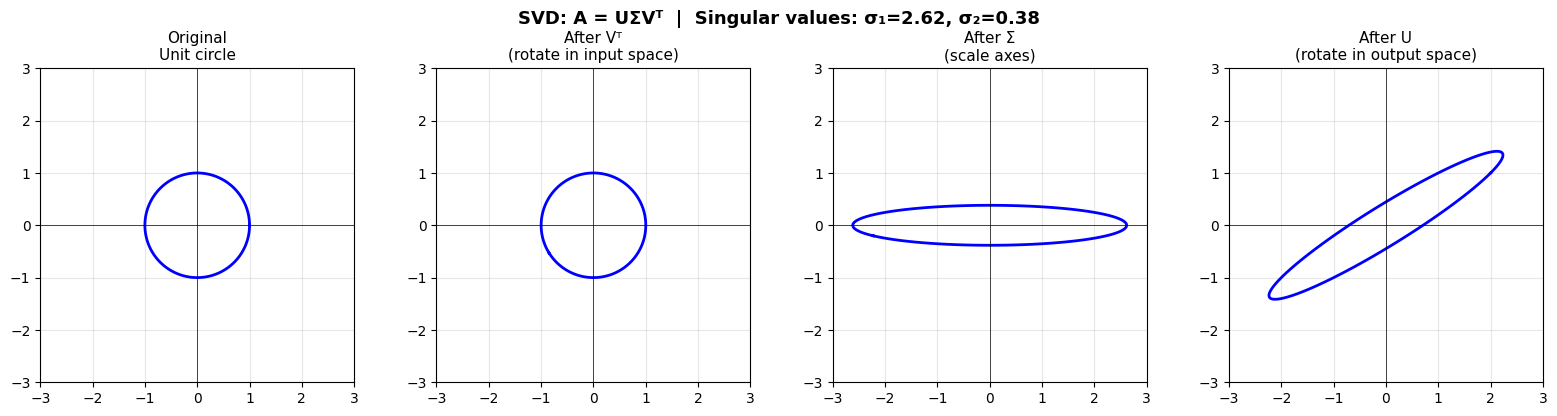

In [ ]:
def visualize_svd_steps(A):
    """Visualize SVD as: rotate by Vᵀ, scale by Σ, rotate by U."""

    U, sigma, Vt = np.linalg.svd(A)

    # For 2×2, we can visualize nicely
    # Unit circle
    theta = np.linspace(0, 2*np.pi, 100)
    circle = np.array([np.cos(theta), np.sin(theta)])

    # Step through the transformation
    step1 = Vt @ circle                          # Rotate by Vᵀ
    step2 = np.diag(sigma) @ step1               # Scale by Σ
    step3 = U @ step2                            # Rotate by U

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    titles = [
        'Original\nUnit circle',
        'After Vᵀ\n(rotate in input space)',
        'After Σ\n(scale axes)',
        'After U\n(rotate in output space)'
    ]
    data = [circle, step1, step2, step3]

    for ax, title, pts in zip(axes, titles, data):
        ax.plot(pts[0], pts[1], 'b-', lw=2)
        ax.axhline(y=0, color='k', lw=0.5)
        ax.axvline(x=0, color='k', lw=0.5)
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.set_title(title, fontsize=11)

    plt.suptitle(f'SVD: A = UΣVᵀ  |  Singular values: σ₁={sigma[0]:.2f}, σ₂={sigma[1]:.2f}',
                 fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()


# 2×2 example
A = np.array([[2, 1], [1, 1]], dtype=float)
print("Matrix A:")
print(A)
visualize_svd_steps(A)

Matrix A:
[[3. 1.]
 [0. 1.]]

This shears and stretches — SVD reveals the true scaling behavior


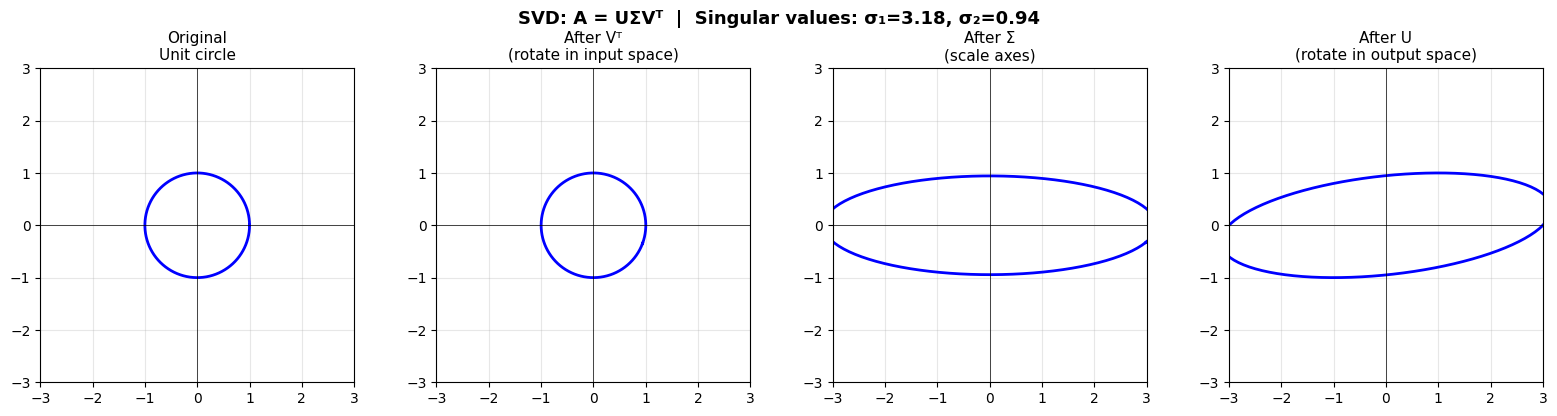

In [ ]:
# A more dramatic transformation
A = np.array([[3, 1], [0, 1]], dtype=float)
print("Matrix A:")
print(A)
print("\nThis shears and stretches — SVD reveals the true scaling behavior")
visualize_svd_steps(A)

Matrix shape: (50, 40)
True rank: 2
Singular values (first 10): [42.94 38.06  6.52  5.9   5.73  5.29  5.16  4.89  4.73  4.51]


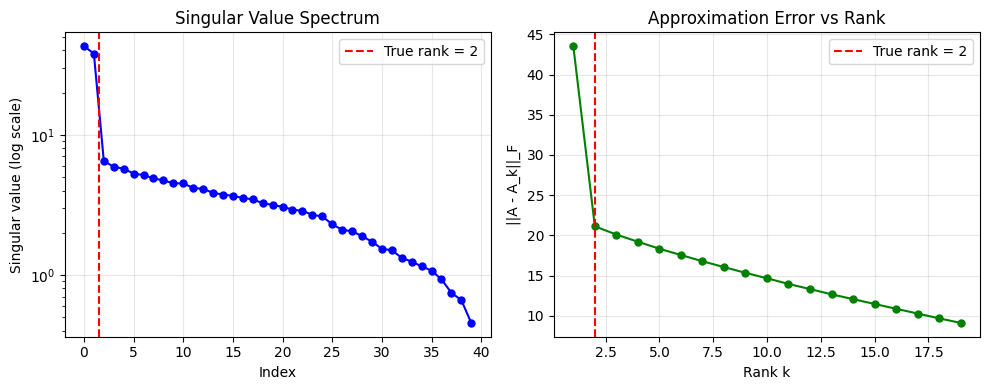


Error drops dramatically up to rank 2, then slowly (just fitting noise)


In [ ]:
np.random.seed(42)

true_rank = 2
m, n = 50, 40

A_low_rank = np.random.randn(m, true_rank) @ np.random.randn(true_rank, n)
noise_level = 0.5
A = A_low_rank + noise_level * np.random.randn(m, n)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"Matrix shape: {A.shape}")
print(f"True rank: {true_rank}")
print(f"Singular values (first 10): {sigma[:10].round(2)}")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.semilogy(sigma, 'bo-', markersize=5)
plt.axvline(x=true_rank - 0.5, color='r', linestyle='--', label=f'True rank = {true_rank}')
plt.xlabel('Index')
plt.ylabel('Singular value (log scale)')
plt.title('Singular Value Spectrum')
plt.legend()
plt.grid(True, alpha=0.3)

errors = []
for k in range(1, 20):
    # TODO: Compute rank-k approximation: U[:,:k] @ diag(sigma[:k]) @ Vt[:k,:]
    A_k = ____________________

    # TODO: Compute Frobenius norm of the error (A - A_k)
    error = ____________________
    errors.append(error)

plt.subplot(1, 2, 2)
plt.plot(range(1, 20), errors, 'go-', markersize=5)
plt.axvline(x=true_rank, color='r', linestyle='--', label=f'True rank = {true_rank}')
plt.xlabel('Rank k')
plt.ylabel('||A - A_k||_F')
plt.title('Approximation Error vs Rank')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nError drops dramatically up to rank {true_rank}, then slowly (just fitting noise)")